# Sine fit - Nyquist-Shannon with MCU data

In [93]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import triang
import csv
from scipy.optimize import curve_fit

# Variables for directories
DATADIR = "../data-source"
OUTPUTDIR = "./output"

Intervallo di campionamento =  -0.0010000000000000009  secondi


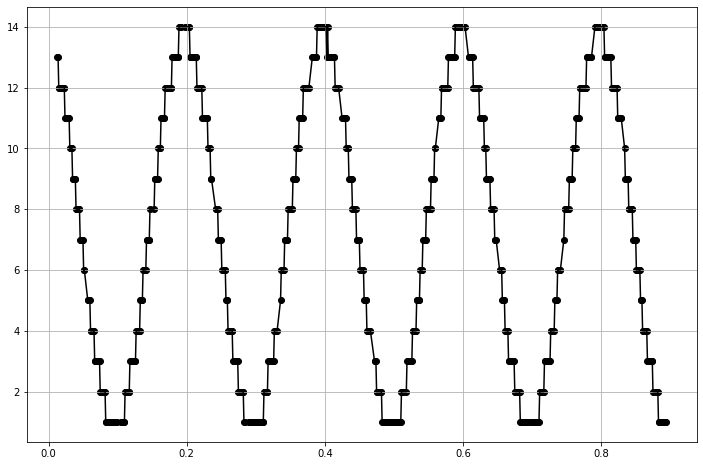

In [94]:
name = 8
file = pd.read_csv(f"../data-source/4-11-21/S{name}.csv")

start = 0
end   = 800

data = file.to_numpy().transpose()
fig, ax = plt.subplots(figsize=(12,8))

xdata = data[0][start:end]
ydata = data[1][start:end]

ax.plot(xdata, ydata, color = "black")
ax.scatter(data[0][start:end], data[1][start:end], color = "black")
ax.grid()
print("Intervallo di campionamento = ", data[0][0] - data[0][1], " secondi")

In [102]:
def func(x, f, p, A, O):
    return A * np.sin(f * 2 * np.pi * x + p) + O


In [162]:
expectedF =5
def nyq_graph(ax, expectedF, xdata, ydata, limit_data, initGuessF):
    #bv = ((5., 2000.), # frequenza
     #     (0., 7.), # fase
      #    (0.1, 5), # Ampiezza
       #   (-3., 0.1)) # Offset

    bv = (
        (-2000., -2000., 2., -1000.),
        (2000., +20000, 12., 1000.)
    )

    #p0=[6., -0. , (max(ydata) - min(ydata)) / 2. + 4, (max(ydata) + min(ydata)) / 2.]
    p0=[initGuessF, -0. , (max(ydata) - min(ydata)) / 1.8 + 4, (max(ydata) + min(ydata)) / 2.]
    p0a=[expectedF, -0. , (max(ydata) - min(ydata)) / 1.8 + 4, (max(ydata) + min(ydata)) / 2.]

    #popt, pcov = curve_fit(func, xdata, ydata, p0, bounds= bv)
    popt, pcov   = curve_fit(func, xdata, ydata, p0  )#bounds=bv)
    popt2, pcov2 = curve_fit(func, xdata, ydata, p0a )#bounds=bv)
    

    ax.scatter(xdata[:limit_data], ydata[:limit_data], color = "black", marker = "s")
    #ax.plot(xdata[:limit_data], ydata[:limit_data], color="black", label="dati\nsperimentali")
    xinterp = np.linspace(xdata[0], xdata[limit_data - 1], 1000)
    #Qua in mezzo succede qualche vaccata con le istanze in memoria dei plot, perché eseguite singolarmente la riga sopra e sotto questa girano
    #benissimo, ma se le faccio girare una dopo l'altra esce solo l'ultima
    popt2[0] = expectedF
    ax.plot(xinterp, func(xinterp, *popt2), color = "red", label="curva\nattesa")
    ax.plot(xinterp, func(xinterp, *popt), color = "blue", label="fit", linestyle='-.')
    

    ax.set(xlabel = "Tempo (s)", ylabel = "Output digitale (decimale)", title = "f = " + str(expectedF) + " Hz")
    ax.grid()
    #ax.legend(bbox_to_anchor=(0.9,0.2))

    #plt.savefig(f"{OUTPUTDIR}/nyquist_mcu_s{name}.pdf")



# Cumulative

In [163]:
cumulative = {
    8: (5, 800 , 5),
    9: (10, 300, 10),
    10:(50, 100, 50),
    11:(100, 60, 100),
    12:(130, 40, 130),
    13:(180, 35, 180),
    14:(230, 25, 230),
    15:(270, 25, 270),
    16:(320, 15, 320),
    17:(360, 15, 360),
    18:(400, 15, 400),
    19:(450, 10, 450),
    20:(500, 10, 500),
    21:(600, 10, abs(600 - 1000*int(round(600/1000)))),
    22:(700, 10, abs(700 - 1000*int(round(700/1000)))),
    23:(850, 7 , abs(850 - 1000*int(round(850/1000)))),
    24:(1000, 5, abs(1000 - 1000*int(round(1000/1000)))),
    25:(2000, 4, abs(2000 - 1000*int(round(2000/1000)))),
}

# f_attesa, n_punti, f_iniziale_minimizzatore


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


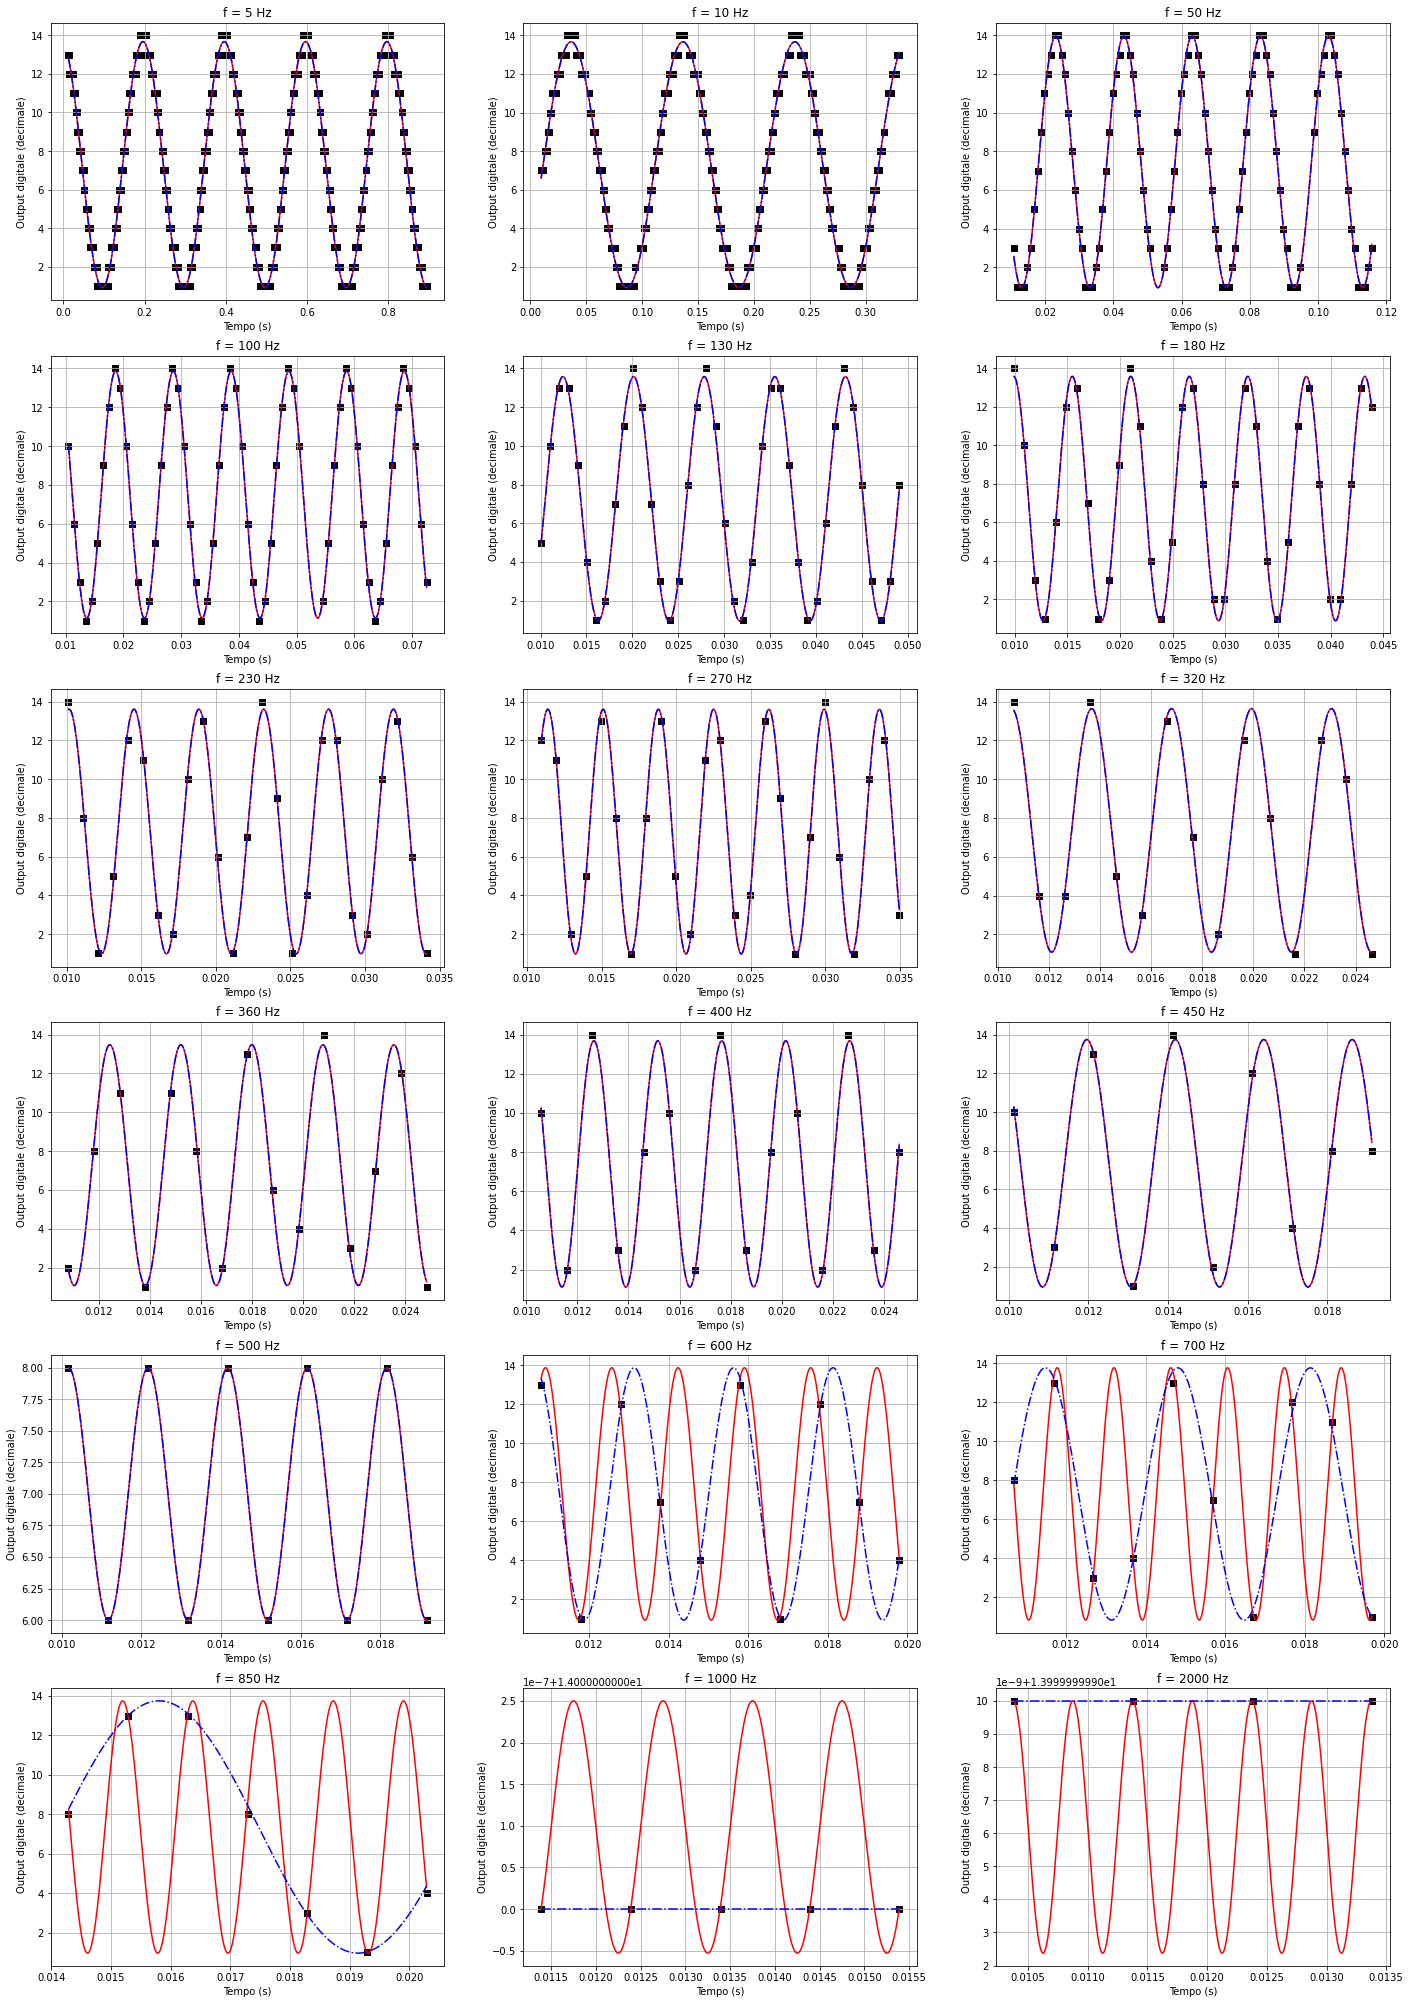

In [164]:
fig = plt.figure(figsize = (24, 48)) # 3x8

for k,v in cumulative.items():
    file = pd.read_csv(f"../data-source/4-11-21/S{k}.csv")

    start = 0
    end   = 800

    data = file.to_numpy().transpose()
    
    xdata = data[0][start:end]
    ydata = data[1][start:end]

    deltaT = xdata[1] - xdata[0]
    
    ax = fig.add_subplot(8,3, (k-7))
    
    nyq_graph(ax, v[0], xdata, ydata, v[1], v[2])
plt.savefig(f"{OUTPUTDIR}/cumulative_nyquist_mcu.pdf")

In [149]:
print('fit: f=%5.3f, p%5.3f, A=%5.3f, O=%5.3f' % tuple(popt))

NameError: name 'popt' is not defined